# <center> Bootcamp MIA </center>
## <center> Aula 9 - Ensemble </center>

# Aula 9 - Ensemble & Random Forest
## 1. O que é um ensemble?
Junção de vários modelos, geralmente mais fracos, que juntos geram um melhor preditor. Basicamente segue a ideia de que várias "cabeças" pensam melhor do que uma.

In [ ]:
## imports necessarios

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, auc, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

Criaremos um modelo para predizer pessoas que devem procurar tratamento para saúde mental em empresas de tecnologia.

Vamos ler os dados e analisar o dataset:

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/WoMakersCode/data-science-bootcamp/master/5.%20Algoritmos%20de%20Machine%20Learning%20e%20aplica%C3%A7%C3%B5es%20em%20larga%20escala/data/survey.csv")


Dataset retirado do kaggle, porém foram filtrados apenas os países Canada, United Kingdom e United States para facilitar a análise

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1008 non-null   object
 1   Age                        1008 non-null   int64 
 2   Gender                     1008 non-null   object
 3   Country                    1008 non-null   object
 4   state                      740 non-null    object
 5   self_employed              991 non-null    object
 6   family_history             1008 non-null   object
 7   treatment                  1008 non-null   object
 8   work_interfere             811 non-null    object
 9   no_employees               1008 non-null   object
 10  remote_work                1008 non-null   object
 11  tech_company               1008 non-null   object
 12  benefits                   1008 non-null   object
 13  care_options               1008 non-null   object
 14  wellness

In [ ]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Vemos várias variáveis como objetos e vários NaNs, vamos tratá-los.



In [ ]:
# Timestamp:
del df['Timestamp']

### Variáveis com NaN:


In [ ]:
# comments:
df.loc[df['comments'].notnull(), 'comments'].head()

12    I'm not on my company's health insurance which...
14    I have chronic low-level neurological issues t...
15    My company does provide healthcare but not to ...
22                  Relatively new job. Ask again later
23    Sometimes I think  about using drugs for my me...
Name: comments, dtype: object

Nao aprendemos NLP... ainda

In [ ]:
del df['comments']

work_interfere:

In [ ]:
df['work_interfere'].value_counts()

Sometimes    389
Never        173
Rarely       139
Often        110
Name: work_interfere, dtype: int64

In [ ]:
df['work_interfere'].fillna('DontKnow', inplace=True)

self_employed:



In [ ]:
df['self_employed'].value_counts()

No     896
Yes     95
Name: self_employed, dtype: int64

In [ ]:
df['self_employed'].fillna('No', inplace=True)

In [ ]:
df['state'].value_counts()

CA    138
WA     70
NY     56
TN     45
TX     44
OH     30
PA     29
OR     29
IL     28
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
GA     12
WI     12
MO     12
UT     10
CO      9
AL      8
AZ      7
MD      7
OK      6
NJ      6
KY      5
SC      5
DC      4
CT      4
IA      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64

In [ ]:
del df['state']

### Variaveis categoricas
Gender:

In [ ]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'female', 'male', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'Cis Male', 'Woman', 'f',
       'Male (CIS)', 'queer/she/they', 'non-binary', 'Femake', 'woman',
       'Make', 'Nah', 'Enby', 'Genderqueer', 'Female ', 'Androgyne',
       'Agender', 'cis-female/femme', 'Guy (-ish) ^_^',
       'male leaning androgynous', 'Male ', 'Man', 'Trans woman', 'msle',
       'Neuter', 'Female (trans)', 'Female (cis)', 'Mail', 'cis male',
       'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

Vemos muitas categorias aqui, vamos tratar:

In [ ]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^",  "neuter",  "queer", "ostensibly male, unsure what that really means"]           
female_str = ["trans-female", "cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail", "trans woman", "female (trans)"]

for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='other', inplace=True)


In [ ]:
df['Gender'].value_counts()

male      772
female    224
other      11
p           1
Name: Gender, dtype: int64

In [ ]:
df = df[df['Gender']!='p']

In [ ]:
df['Gender'].unique()

array(['female', 'male', 'other'], dtype=object)

Vamos ver quantos países temos:

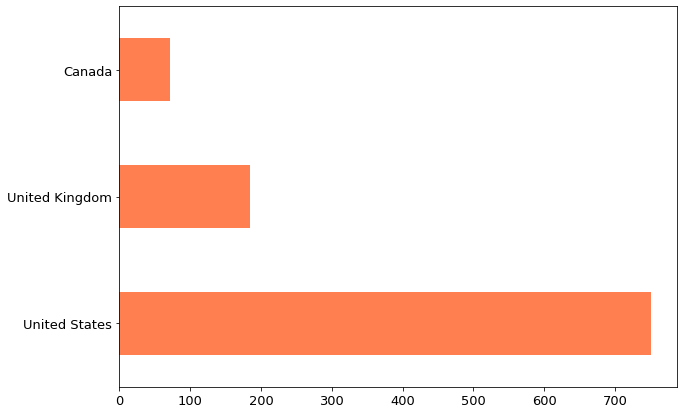

In [ ]:
df['Country'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=13)

Vamos fazer o processo de one-hot enconding utilizando a função get_dummies do pandas. Ele transforma cada valor da coluna em uma nova coluna binária, exemplo:

In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help'])

In [ ]:
df.shape

(1007, 71)

In [ ]:
df.columns.values

array(['Age', 'Gender_female', 'Gender_male', 'Gender_other',
       'Country_Canada', 'Country_United Kingdom',
       'Country_United States', 'self_employed_No', 'self_employed_Yes',
       'family_history_No', 'family_history_Yes', 'treatment_No',
       'treatment_Yes', 'work_interfere_DontKnow', 'work_interfere_Never',
       'work_interfere_Often', 'work_interfere_Rarely',
       'work_interfere_Sometimes', 'no_employees_1-5',
       'no_employees_100-500', 'no_employees_26-100',
       'no_employees_500-1000', 'no_employees_6-25',
       'no_employees_More than 1000', 'remote_work_No', 'remote_work_Yes',
       'tech_company_No', 'tech_company_Yes', "anonymity_Don't know",
       'anonymity_No', 'anonymity_Yes', "leave_Don't know",
       'leave_Somewhat difficult', 'leave_Somewhat easy',
       'leave_Very difficult', 'leave_Very easy',
       'mental_health_consequence_Maybe', 'mental_health_consequence_No',
       'mental_health_consequence_Yes', 'phys_health_consequence_May

In [ ]:
df.drop(columns=['family_history_No', 'treatment_No', 'remote_work_No', 'tech_company_No'], inplace=True)

Vamos dar uma olhada na distribuição da variável resposta:

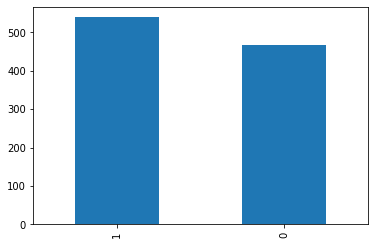

In [ ]:
df['treatment_Yes'].value_counts().plot(kind='bar')

# Finalmente, vamos ao treinamento!
Vamos separar os dados em treino e teste:

In [ ]:
X = df.drop('treatment_Yes', axis=1)
y = df['treatment_Yes']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.15, random_state=0)
print(X_train.shape)

(855, 66)


Vamos usar os dois métodos mais simples que aprendemos até agora para tentar predizer

## Relembrando Árvores de Decisão:

In [ ]:
# crie o modelo com random state igual a 10
model_tree = DecisionTreeClassifier(random_state=10)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
y_pred_tree_train = model_tree.predict_proba(X_train)
print("Acurácia: {:.2f}".format(accuracy_score(y_train, y_pred_tree_train[:,1]>0.5)))
print("Precisão: {:.2f}".format(precision_score(y_train, y_pred_tree_train[:,1]>0.5)))
print("Sensibilidade: {:.2f}".format(recall_score(y_train, y_pred_tree_train[:,1]>0.5)))


Acurácia: 1.00
Precisão: 1.00
Sensibilidade: 1.00


In [ ]:
y_pred_tree = model_tree.predict_proba(X_test)
print("Acurácia: {:.2f}".format(accuracy_score(y_test, y_pred_tree[:,1]>0.5)))
print("Precisão: {:.2f}".format(precision_score(y_test, y_pred_tree[:,1]>0.5)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, y_pred_tree[:,1]>0.5)))


Acurácia: 0.82
Precisão: 0.84
Sensibilidade: 0.82


## KNN

* algoritmo de abordagem "preguiçosa"
* assume que elementos similares estão em proximidade
* Calcula a distância para os N vizinhos mais próximos e determina a classe de acordo com a classe dos vizinhos

Mais informações: https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

In [ ]:
# crie o modelo com random state igual a 10
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn_train = model_knn.predict_proba(X_train)
print("Acurácia: {:.2f}".format(accuracy_score(y_train, y_pred_knn_train[:,1]>0.5)))
print("Precisão: {:.2f}".format(precision_score(y_train, y_pred_knn_train[:,1]>0.5)))
print("Sensibilidade: {:.2f}".format(recall_score(y_train, y_pred_knn_train[:,1]>0.5)))


Acurácia: 0.78
Precisão: 0.81
Sensibilidade: 0.78


In [ ]:
y_pred_knn = model_knn.predict_proba(X_test)
print("Acurácia: {:.2f}".format(accuracy_score(y_test, y_pred_knn[:,1]>0.5)))
print("Precisão: {:.2f}".format(precision_score(y_test, y_pred_knn[:,1]>0.5)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, y_pred_knn[:,1]>0.5)))


Acurácia: 0.70
Precisão: 0.73
Sensibilidade: 0.71


## Como acham que podemos combinar esses modelos?
* Fazendo votação das predições
* Fazendo média das predições
* Usando as predições como entrada para uma segunda camada de modelos

In [ ]:
model_vot = VotingClassifier(estimators=[('tree', model_tree), ('knn', model_knn)], voting='soft')
model_vot.fit(X_train, y_train)  

VotingClassifier(estimators=[('tree', DecisionTreeClassifier(random_state=10)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [ ]:
y_pred = model_vot.predict(X_test)
print("Acurácia: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precisão: {:.2f}".format(precision_score(y_test, y_pred)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, y_pred)))

Acurácia: 0.82
Precisão: 0.85
Sensibilidade: 0.82


In [ ]:
#Exemplo Stacking
x_novo = np.array([y_pred_tree_train[:,1], y_pred_knn_train[:,1]])
x_novo = x_novo.transpose()

x_novo_test = np.array([y_pred_tree[:,1], y_pred_knn[:,1]])
x_novo_test = x_novo_test.transpose()

In [ ]:
model_lr2 = LogisticRegression()
model_lr2.fit(x_novo, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = model_lr2.predict_proba(x_novo_test)
print("Acurácia: {:.2f}".format(accuracy_score(y_test, y_pred_lr[:,1]>0.5)))
print("Precisão: {:.2f}".format(precision_score(y_test, y_pred_lr[:,1]>0.5)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, y_pred_lr[:,1]>0.5)))

Acurácia: 0.82
Precisão: 0.84
Sensibilidade: 0.82


## 2. Tipos de Ensemble:
Existem vários formas diferentes de combinar os modelos. As principais são:

### 1. Voting Based Classifier:
**1. a) Majority Vote**

A ideia é fazer uma votação entre as predições dos modelos. A classe que tiver mais votos vence. Também podemos ter uma variação desse algoritmo, o Weighted Voting Classifier, em que na votação alguns modelos tem mais peso que outros.



**1. b) Average Classifier:**

A ideia é similar ao anterior, porém ao invés de uma votação é calculada a média das predições. Da mesma forma podemos ter alguns modelos com mais peso que outros tendo um Weighted Average Classifier 

### 2. Stacking:
Nesse modelo as predições dos modelos anteriores são combinadas por um outro modelo para obter a saída final. Podem ser criadas várias camadas com modelos diferentes.



### 3. Boosting:
Os modelos são treinados com os mesmos datasets, porém os pesos das intâncias são ajustados de acordo com o erro das predições anteriores. Veram mais na próxima aula...



### 4. BAGGING:
Todos os modelos deste tipo de ensemble são do mesmo algoritmo, porém os dados de entrada de cada um são amostras do dado original, com a mesma quantidade de dados do dataset original, selecionadas usando o método bootstrap (aleatória com repetição).

### RANDOM FOREST
Como Funciona?
* Algoritmo de bagging que usa árvores de decisão
* Cada árvore terá um conjunto diferente de dados e de features
* Out-of-bag score: os dados que não foram usados naquela árvore são utilizados como teste

In [ ]:
model = RandomForestClassifier(n_estimators=10, random_state=0, oob_score=True)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=0)

In [ ]:
model.oob_score_

0.7403508771929824

In [ ]:
y_pred = model.predict(X_test)
print("Acurácia: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precisão: {:.2f}".format(precision_score(y_test, y_pred)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, y_pred)))

Acurácia: 0.80
Precisão: 0.84
Sensibilidade: 0.78


Vamos testar outras combinações de parâmetros?

Dica 1: Manter o mesmo random_state para comparação de resultados

Dica 2: Os parâmetros são similares as árvores de decisão

Dica 3: Número de estimadores e de features são os mais relevantes 

In [ ]:
model = RandomForestClassifier(n_estimators=20, random_state=0, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print("OOB Score: {:.2f}".format(model.oob_score_))
print("Acurácia: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precisão: {:.2f}".format(precision_score(y_test, y_pred)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, y_pred)))

# essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

print('AUC: ' + str(auc(fpr, tpr)))

OOB Score: 0.78
Acurácia: 0.87
Precisão: 0.86
Sensibilidade: 0.90
AUC: 0.9270123974157499


In [ ]:
model = RandomForestClassifier(n_estimators=40, random_state=0, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print("OOB Score: {:.2f}".format(model.oob_score_))
print("Acurácia: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precisão: {:.2f}".format(precision_score(y_test, y_pred)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, y_pred)))

# essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

print('AUC: ' + str(auc(fpr, tpr)))

OOB Score: 0.80
Acurácia: 0.86
Precisão: 0.85
Sensibilidade: 0.90
AUC: 0.9325126593329841


In [ ]:
model = RandomForestClassifier(n_estimators=50, random_state=0, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print("OOB Score: {:.2f}".format(model.oob_score_))
print("Acurácia: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precisão: {:.2f}".format(precision_score(y_test, y_pred)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, y_pred)))

# essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

print('AUC: ' + str(auc(fpr, tpr)))

OOB Score: 0.81
Acurácia: 0.88
Precisão: 0.86
Sensibilidade: 0.92
AUC: 0.9312903789069321


In [ ]:
model = RandomForestClassifier(n_estimators=50, random_state=0, oob_score=True, max_features=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print("OOB Score: {:.2f}".format(model.oob_score_))
print("Acurácia: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precisão: {:.2f}".format(precision_score(y_test, y_pred)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, y_pred)))

# essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

print('AUC: ' + str(auc(fpr, tpr)))

OOB Score: 0.81
Acurácia: 0.93
Precisão: 0.91
Sensibilidade: 0.96
AUC: 0.9314649903963681


* **Dica** - podemos buscar os parâmetros ideias de forma "automática" fazendo GridSearch

Feature importance:

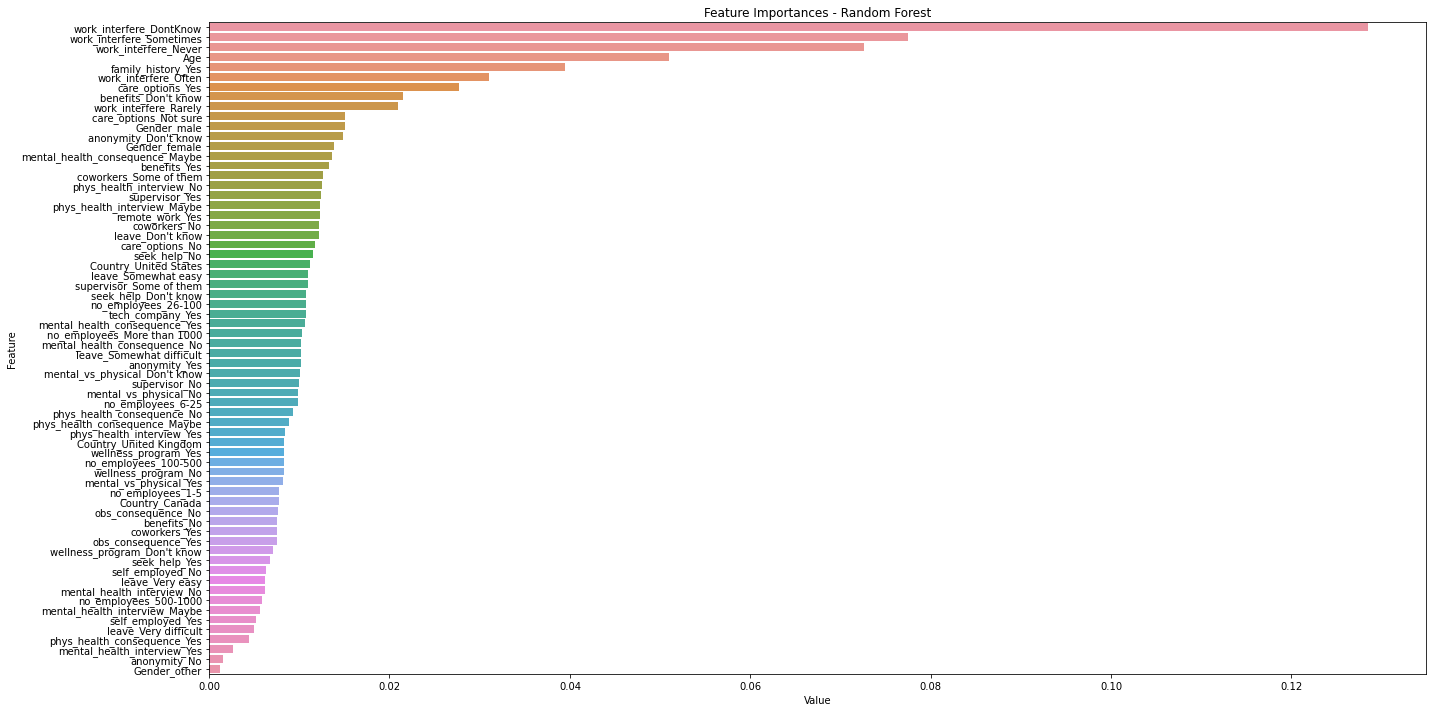

<Figure size 432x288 with 0 Axes>

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Feature Importances - Random Forest')
plt.tight_layout()
plt.show()
plt.savefig('rf_importances-01.png')

**Vamos comparar as variáveis mais correlacionadas com a variável resposta vs as variáveis mais importantes de acordo com a Random Forest**

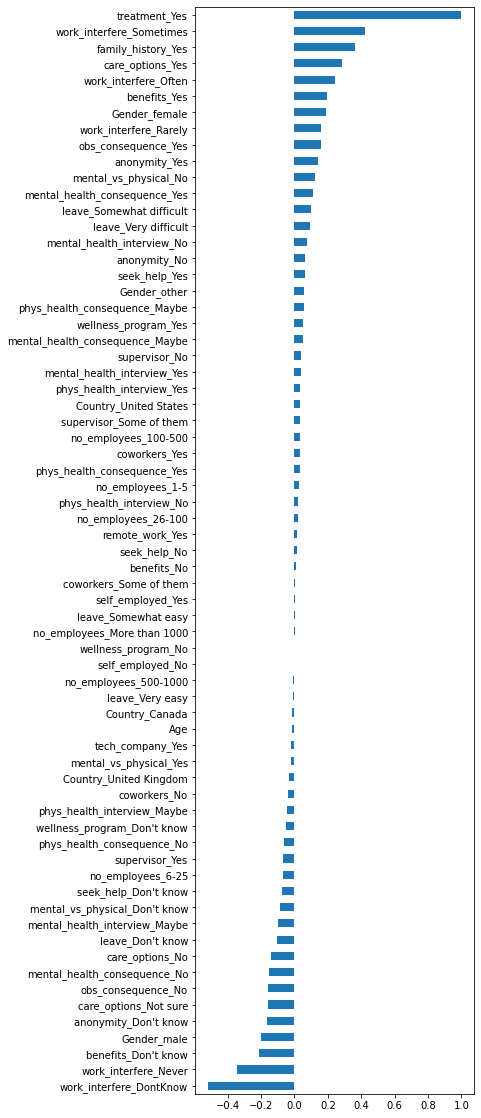

In [ ]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(5,20))
corr_matrix['treatment_Yes'].sort_values(ascending=True).plot(kind='barh')

Correlação é um termo estatístico que se refere à proximidade de duas variáveis, em termos de relação linear.

Já a feature importance (importância das variáveis) identifica quais variáveis são mais influentes ao diferenciar suas classes (desde que o modelo tenha um bom desempenho), quais as que foram usadas mais vezes, em mais amostras para fazer a classificação.

A vantagem de usar Feature Importance é que pode ser usada com qualquer tipo de variável e já é feita durante a criação do modelo. A vantagem da correlação é que também pode ser usada para remoção de variáveis que são correlacionadas entre si, para não enviarmos várias vezes a mesma informação, e pode ser usada independente do tipo ou qualidade do modelo.

Lembrando que nada impede de usarmos as duas.

In [ ]:
corr_matrix['treatment_Yes'].abs().sort_values()[0:3].index

Index(['no_employees_More than 1000', 'leave_Somewhat easy',
       'wellness_program_No'],
      dtype='object')

In [ ]:
Xtrain_menos3 = X_train.drop(columns=corr_matrix['treatment_Yes'].abs().sort_values()[0:3].index)
Xtest_menos3 = X_test.drop(columns=corr_matrix['treatment_Yes'].abs().sort_values()[0:3].index)

In [ ]:
model = RandomForestClassifier(n_estimators=50, random_state=0, oob_score=True, max_features=7)
model.fit(Xtrain_menos3, y_train)
y_pred = model.predict(Xtest_menos3)
y_pred_proba = model.predict_proba(Xtest_menos3)

print("OOB Score: {:.2f}".format(model.oob_score_))
print("Acurácia: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precisão: {:.2f}".format(precision_score(y_test, y_pred)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, y_pred)))

# essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

print('AUC: ' + str(auc(fpr, tpr)))

OOB Score: 0.82
Acurácia: 0.93
Precisão: 0.90
Sensibilidade: 0.98
AUC: 0.9325999650777022


In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(model.estimators_[0], out_file='tree.dot', 
                feature_names = X.drop(columns=corr_matrix['treatment_Yes'].abs().sort_values()[0:3].index).columns,
                class_names = ['1', '0'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, max_depth=4)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=50'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

**Quais tipos de problemas podemos resolver com random forest?**
* Tanto regressão quanto classificação
* Problemas variados de negócios, ex: churn, predição de vendas, etc.
* Basicamente quase todos os problemas
* Ruim para trends (tendências) e problemas com dados em que haverão muitos dados não vistos no treinamento

**Quais vantagens e desvantagens vocês enxergam?** <br/>
VANTAGENS
* Tanto regressão quanto classificação
* Pouca parametrização
* Não causa overfitting
* Média interpretabilidade

DESVANTAGENS
* Quanto mais árvores maior o tempo de predição

### Light GBM

In [ ]:
import lightgbm as lgb

In [ ]:
model = lgb.LGBMClassifier(objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          learning_rate=0.1,
          n_estimators=50,
          max_features=7,
          num_leaves= 8)

**outros parametros:**

* **max_depth**: altura da árvore
* **min_data_in_leaf**: número mínimo de amostrar que precisam cair numa folha para ela ser criada
* **categorial_features**: variáveis categóricas que vamos usar no nosso modelo. (isso se não tratarmos antes, o modelo consegue tratar sozinho)

* **Outros**: [Documentação do LGBM](https://lightgbm.readthedocs.io/en/v3.3.2/Parameters.html#max_depth)

### Tarefa: Tente trocar e adicionar parâmetros para o modelo e obter melhores resultados! Lembre-se de olhar os resultados do treino e teste para avaliar se seu modelo não está com overffiting

In [ ]:
model.fit(Xtrain_menos3, y_train)

LGBMClassifier(max_features=7, n_estimators=50, n_jobs=3, num_leaves=8,
               objective='binary')

In [ ]:
y_pred_train = model.predict(Xtrain_menos3)
print("Acurácia: {:.2f}".format(accuracy_score(y_train, y_pred_train)))
print("Precisão: {:.2f}".format(precision_score(y_train, y_pred_train)))
print("Sensibilidade: {:.2f}".format(recall_score(y_train, y_pred_train)))

Acurácia: 0.88
Precisão: 0.85
Sensibilidade: 0.93


In [ ]:
y_pred = model.predict(Xtest_menos3)

y_pred_proba = model.predict_proba(Xtest_menos3)

print("Acurácia: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precisão: {:.2f}".format(precision_score(y_test, y_pred)))
print("Sensibilidade: {:.2f}".format(recall_score(y_test, y_pred)))

# essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

print('AUC: ' + str(auc(fpr, tpr)))

Acurácia: 0.92
Precisão: 0.89
Sensibilidade: 0.98
AUC: 0.9238693906059019


Vamos ver o que acontece quando tiramos o número de folhas

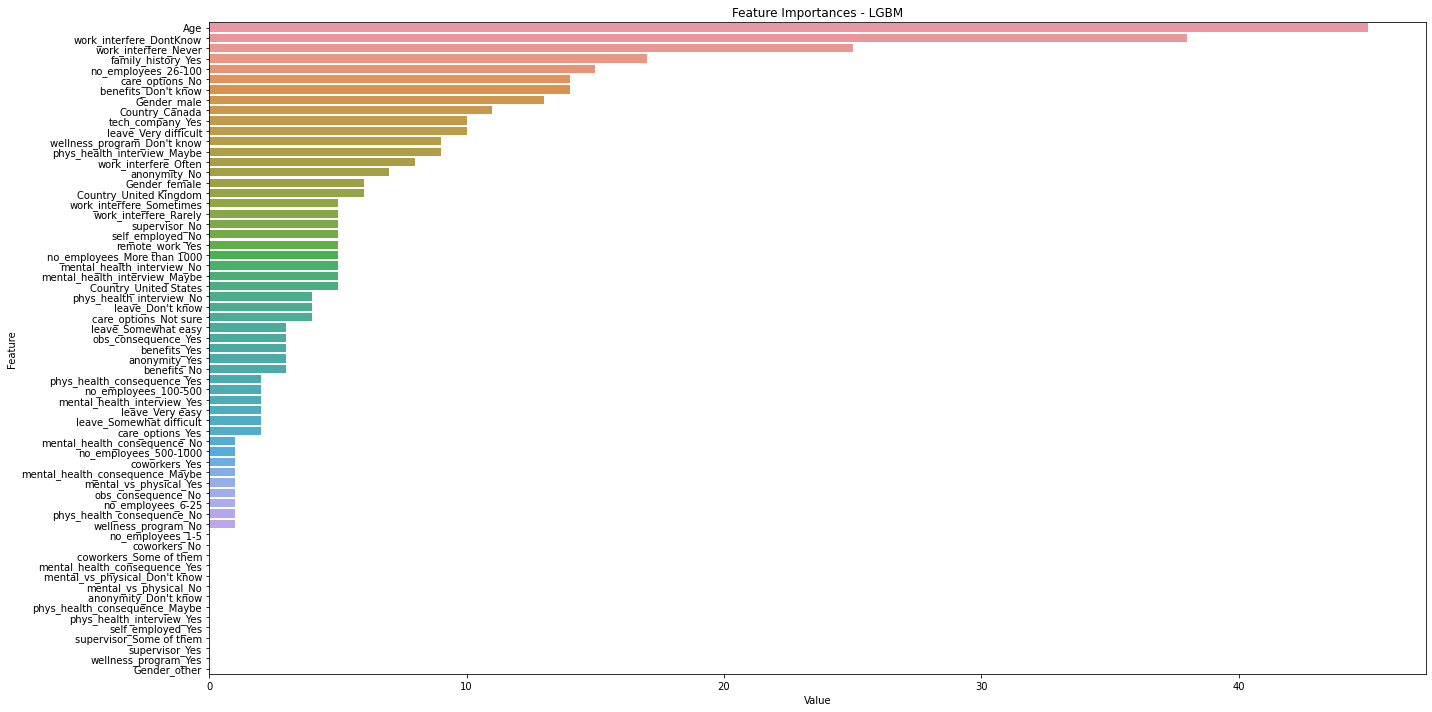

<Figure size 432x288 with 0 Axes>

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Feature Importances - LGBM')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

**Quais vantagens e desvantagens vocês enxergam?**<br/>

VANTAGENS
* Tanto regressão quanto classificação
* Tem alta performance
* Funciona bem com datasets muito grandes

DESVANTAGENS
* É mais propenso a overfitting, por isso não funciona bem com poucos dados

# Desafios legais para serem resolvidos com ensemble:
* https://www.kaggle.com/kashnitsky/topic-10-practice-with-logit-rf-and-lightgbm
* https://www.kaggle.com/c/avito-demand-prediction/data
* https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting
* https://www.kaggle.com/c/sf-crime
* https://www.kaggle.com/c/house-prices-advanced-regression-techniques